In [73]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import operator
import os
from sklearn.cross_validation import train_test_split
from random import shuffle
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedKFold, KFold
import tqdm
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import itertools
import pickle
#matrix inverse
from numpy.linalg import inv
import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import plot_funcs
import modules
#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

n_classifier = 7

col_rs = hp.col_rs
col_es = hp.col_es
col_le = hp.col_le



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
p231 = modules.build_patients(231,90, if_PSV = 0, if_sliding_window = 1, sw_size = 7, log = 1, reg = 1)


/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


thres =  0.2559656384611507
label
0.000000    77
0.099021    28
0.156945    14
0.198042    36
0.229920    10
0.255966    33
0.277259    2 
0.297063    11
0.313889    6 
0.328941    11
            ..
0.820429    1 
0.828442    1 
0.887801    6 
0.913847    2 
0.919450    5 
1.169813    1 
1.186639    1 
1.219655    6 
1.387302    1 
1.759115    5 
Name: patient_id, Length: 58, dtype: int64


In [4]:
p231.features

,filename,region_start_time,long_epi,sleep,Delta1,Delta2,Delta3,Delta4,Theta1,Theta2,Theta3,Theta4,Alpha1,Alpha2,Alpha3,Alpha4,Beta1,Beta2,Beta3,Beta4,LowGamma1,LowGamma2,LowGamma3,LowGamma4,HighGamma1,HighGamma2,HighGamma3,HighGamma4,Broadband1,Broadband2,Broadband3,Broadband4,i12,i34,epoch,label,id,if_stimulated
647,1.313099e+17,2017-02-07 04:00:29.000016000,0.0,1.0,52.540879,43.652166,169.626561,47.994966,77.653426,73.585284,132.283194,41.393056,76.774523,83.716009,73.781896,24.715429,158.709932,195.014768,132.185618,57.815951,66.921943,84.626163,59.516749,41.280686,17.842459,19.848230,17.768902,15.825719,449.080826,497.912560,583.423582,228.331494,1.0,0.0,0,0.447940,231,False
648,1.313099e+17,2017-02-07 10:00:27.000028800,0.0,0.0,67.371989,36.895066,99.998346,40.672797,83.025855,49.766390,101.685936,43.323707,52.038473,63.795443,55.284608,19.814494,135.766837,143.574827,103.785208,42.320166,66.032288,64.156730,52.980774,39.005670,18.193194,18.552144,19.051299,15.535918,420.025064,374.851675,431.144569,200.212985,0.0,0.0,0,0.447940,231,False
649,1.313100e+17,2017-02-07 16:00:26.000035200,0.0,0.0,99.857643,43.743936,131.445025,50.462590,78.433538,52.023979,110.203051,36.999955,64.644898,55.724151,58.688134,19.871226,181.487332,155.427435,121.713626,47.794228,72.383902,61.297536,63.108861,41.514227,20.093607,19.112256,21.323889,16.489723,514.946178,386.780745,504.752669,212.883592,0.0,1.0,0,0.447940,231,False
650,1.313103e+17,2017-02-07 22:00:13.000032000,0.0,0.0,129.677420,85.919986,104.240635,33.813202,111.814219,114.253805,110.936082,41.216232,105.378780,114.072113,62.648212,27.869914,187.564442,220.525742,115.320875,53.176903,67.959740,67.252669,51.975569,33.809532,18.470845,20.585696,17.197160,13.557635,619.553782,619.705097,461.335672,202.953935,4.0,2.0,0,0.447940,231,False
651,1.313103e+17,2017-02-08 04:00:12.000038400,0.0,1.0,91.679727,60.534557,157.204467,58.719918,79.233067,64.724569,102.978850,40.099788,50.436315,75.311729,57.604117,19.613029,152.275433,146.887291,119.058054,44.874632,58.494189,54.774480,51.623943,35.571129,17.948774,17.112005,18.905673,14.801637,449.277355,418.643967,507.236063,213.607815,0.0,0.0,1,0.496981,231,False
652,1.313108e+17,2017-02-08 10:00:10.999958400,0.0,0.0,116.925373,54.099957,151.459489,57.000622,94.976730,44.356892,127.877129,37.657951,60.909213,50.234004,56.588664,20.412051,175.384442,139.574490,129.467766,43.214728,72.943196,67.520685,59.434903,40.154272,19.055256,19.792319,21.209860,16.168228,538.850676,375.030443,544.170195,214.113030,0.0,1.0,1,0.496981,231,False
653,1.313108e+17,2017-02-08 16:00:09.999964800,0.0,0.0,89.494190,50.823708,146.509136,54.689405,89.035278,65.329579,116.948584,39.398970,53.993892,60.320291,59.247493,21.095735,164.874577,137.077698,124.463671,43.715393,72.642027,65.786504,58.806123,38.956958,19.665885,20.966004,21.826760,17.061921,488.830085,399.226190,526.187100,214.809479,0.0,0.0,1,0.496981,231,False
654,1.313117e+17,2017-02-09 15:59:54.999974400,0.0,0.0,82.446978,40.611951,119.250325,55.420373,95.763307,71.407570,122.993170,57.822330,67.209221,66.088375,63.251004,29.921334,166.247965,152.007860,113.562948,47.980650,64.437075,65.954881,50.772976,40.047462,18.549292,19.435048,18.441909,14.647193,493.822944,414.372099,487.273913,245.373050,0.0,0.0,2,0.645200,231,False
655,1.313126e+17,2017-02-09 21:59:42.999964800,0.0,0.0,326.016488,256.695094,346.094522,96.836384,305.556517,262.238440,397.426399,224.110307,138.953876,145.565883,211.420221,231.338610,177.562402,170.194289,253.711598,264.543956,50.122690,56.374755,64.771171,103.383557,18.156613,21.049244,17.841345,21.241607,1013.509263,908.738281,1280.147218,938.436500,9.0,28.0,2,0.645200,231,False
656,1.313126e+17,2017-02-10 03:59:41.999971200,0.0,1.0,72.776059,51.659472,142.023056,55.387199,98.074770,73.821734,160.924270,45.976279,56.985345,59.483602,57.492818,24.894696,152.543317,138.803821,114.986092,45.199388,59.410178,62.847114,48.996098,38.588562,17.512215,19.912663,17.567147,16.379624,455.3276

In [96]:
def parameter_tuning_reg(pat, X_train, X_test, y_train, y_test, classifier, C_range_num = 30, if_save = 0,
                     nfold = 10, if_show = 1):
    #defs is a dictionary to initiate classifier with the parameters that don't need to be tuned
    defs = {}
    defs['classifier'] = classifier
    
    num_instances, num_features = X_train.shape[0], X_train.shape[1]
    n_fold = 10
    if pat.reg:
        skf = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    else:
        skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    CV = skf.split(np.zeros(len(y_train)), y_train)
    

    if classifier==8:
        clf_name = 'Linear Regression'
        C_range = 10 ** np.random.uniform(-2, 1, size = C_range_num)
        tuned_params = dict(alpha=C_range)

        
    clf_try = JJ.clf_list(defs)
    
    clf_grid = GridSearchCV(clf_try,
                            param_grid=tuned_params,
                            cv=CV,
                            scoring = 'neg_mean_squared_error',
                            verbose=1,
                           return_train_score = True)
    clf_grid.fit(X_train, y_train)
    print('Best score for validations set: {}'.format(clf_grid.best_score_))
    print('Best parameters: {}'.format(clf_grid.best_params_))

    clf_best = clf_grid.best_estimator_

    y_pred = clf_best.predict(X_test)
    df = pd.DataFrame(clf_grid.cv_results_)

    
    print(clf_best.coef_)
    pat.result[classifier] = df
    pat.estimator[classifier] = clf_best
    pat.score[classifier] = clf_grid.best_score_
    pat.params[classifier] = clf_grid.best_params_


In [97]:
def parameter_tuning_all(pat, C_range_num, label = '', if_scaler = 1, if_remove_icd = 1, if_remove_sleep=1, if_remove_le = 1, le_class = None, sleep_class =None, if_save = 1, if_show = 0, if_remove_delta = 1, if_remove_outliers = 0, if_split = 0, random_state = 42, reg = 0):
    X_train, X_test, y_train, y_test = modules.get_ml_data(pat, if_scaler = if_scaler, if_remove_icd = if_remove_icd, if_remove_sleep = if_remove_sleep, if_remove_le = if_remove_le, sleep_class = sleep_class, le_class = le_class, if_remove_delta = if_remove_delta, if_remove_outliers = if_remove_outliers, if_split = if_split, random_state =random_state)
    train_para = {}
    train_para['if_scaler'], train_para['if_remove_icd'], train_para['if_remove_sleep'], train_para['if_remove_le'] \
    , train_para['le_class'], train_para['if_remove_delta'], train_para['if_remove_outliers'], train_para['random_state'] = \
    if_scaler, if_remove_icd, if_remove_sleep, if_remove_le, le_class, if_remove_delta, if_remove_outliers, random_state
    pat.train_para = train_para
    
    pat.X_train, pat.X_test, pat.y_train, pat.y_test = X_train, X_test, y_train, y_test
    for classifier_int in tqdm.trange(8,9):
        parameter_tuning_reg(pat, X_train, X_test, y_train, y_test, C_range_num = C_range_num, classifier = classifier_int, if_save = if_save, if_show = if_show)
        #save the best estimator
    #JJ.scores_estimators_reg(X_test, y_test, pat= pat, if_save = 0)
        
    if if_save:
        JJ.save_object(pat, hp.prepath_pat + pat.id + '_trained' + label + '.p')

In [98]:
# if_shuffle_label = 1
# if_PSV = 0
# if_sliding_window = 1
# log = 1
# label = 'reg_sw7_log'
# sw_size = 7
# reg = 1
# p231 = modules.build_patients(231,90, if_PSV = if_PSV, if_sliding_window = if_sliding_window, sw_size = sw_size, log = log, if_shuffle_label = if_shuffle_label, reg = reg)
# pat_list = [p231]

In [99]:

for pat in pat_list:
    parameter_tuning_all(pat, label = label, C_range_num = 100, if_save = 1, if_split = 0, reg = reg)

  0%|          | 0/1 [00:00<?, ?it/s]

not split
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/hp/anacon

Best score for validations set: -0.09315623990365415
Best parameters: {'alpha': 3.500607133005001}
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0.
  0. -0. -0. -0. -0. -0.]


In [95]:
pat = pat_list[0]
clf = pat.estimator[8]
y_pred = clf.predict(pat.X_test) 
y_pred
pat.result

{8:     mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
 0   0.001113       0.000284        -0.093156        -0.092973           
 1   0.000929       0.000242        -0.093476        -0.092029           
 2   0.001364       0.000375        -0.093156        -0.092973           
 3   0.000794       0.000220        -0.093156        -0.092973           
 4   0.000684       0.000194        -0.093156        -0.092973           
 5   0.000679       0.000197        -0.093156        -0.092973           
 6   0.000717       0.000198        -0.093156        -0.092973           
 7   0.000610       0.000182        -0.093156        -0.092973           
 8   0.000667       0.000184        -0.093156        -0.092973           
 9   0.000778       0.000206        -0.093465        -0.092199           
 ..       ...            ...              ...              ...           
 90  0.000641       0.000172        -0.093461        -0.092157           
 91  0.000611       0.000173       

In [105]:
pat.y_train

657     0.887801
1022    0.441577
894     0.255966
1035    1.219655
1080    0.354987
1523    0.255966
765     0.099021
939     0.198042
1475    0.610952
676     0.156945
          ...   
768     0.441577
1261    0.255966
667     0.683927
1347    0.000000
718     0.000000
753     0.618676
917     0.000000
1507    0.156945
1082    0.255966
749     0.297063
Name: label, Length: 721, dtype: float64

In [106]:
pat.X_train

array([[-0.35899066, -0.63067282, -0.07205836, ..., -0.60176327,
         0.27605829, -0.16306172],
       [-0.3921113 , -0.37056418, -0.41396379, ..., -0.37467899,
        -0.67906804, -0.43145644],
       [-0.18390384, -0.56044006,  0.0243029 , ..., -0.52337425,
        -0.11090124, -0.5139992 ],
       ...,
       [-0.71573555, -0.63321128, -0.6262436 , ..., -0.58272095,
         0.14447459,  0.01291518],
       [ 0.77107286,  0.86818809,  0.66601032, ...,  1.1938051 ,
         0.61865233,  2.16089647],
       [-0.38135119, -0.4474918 ,  0.67120916, ..., -0.40785572,
        -0.20572534, -0.41215897]])

In [104]:
from sklearn import linear_model

clf = linear_model.Lasso()
clf.fit(pat.X_train, pat.y_train)
y_pred = clf.predict(pat.X_test) 
y_pred

array([0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152016,
       0.30152016, 0.30152016, 0.30152016, 0.30152016, 0.30152

In [57]:
pat_list[0].features

,filename,region_start_time,long_epi,sleep,Delta1,Delta2,Delta3,Delta4,Theta1,Theta2,Theta3,Theta4,Alpha1,Alpha2,Alpha3,Alpha4,Beta1,Beta2,Beta3,Beta4,LowGamma1,LowGamma2,LowGamma3,LowGamma4,HighGamma1,HighGamma2,HighGamma3,HighGamma4,Broadband1,Broadband2,Broadband3,Broadband4,i12,i34,epoch,label,id,if_stimulated
647,1.313099e+17,2017-02-07 04:00:29.000016000,0.0,1.0,52.540879,43.652166,169.626561,47.994966,77.653426,73.585284,132.283194,41.393056,76.774523,83.716009,73.781896,24.715429,158.709932,195.014768,132.185618,57.815951,66.921943,84.626163,59.516749,41.280686,17.842459,19.848230,17.768902,15.825719,449.080826,497.912560,583.423582,228.331494,1.0,0.0,0,0.229920,231,False
648,1.313099e+17,2017-02-07 10:00:27.000028800,0.0,0.0,67.371989,36.895066,99.998346,40.672797,83.025855,49.766390,101.685936,43.323707,52.038473,63.795443,55.284608,19.814494,135.766837,143.574827,103.785208,42.320166,66.032288,64.156730,52.980774,39.005670,18.193194,18.552144,19.051299,15.535918,420.025064,374.851675,431.144569,200.212985,0.0,0.0,0,0.255966,231,False
649,1.313100e+17,2017-02-07 16:00:26.000035200,0.0,0.0,99.857643,43.743936,131.445025,50.462590,78.433538,52.023979,110.203051,36.999955,64.644898,55.724151,58.688134,19.871226,181.487332,155.427435,121.713626,47.794228,72.383902,61.297536,63.108861,41.514227,20.093607,19.112256,21.323889,16.489723,514.946178,386.780745,504.752669,212.883592,0.0,1.0,0,0.198042,231,False
650,1.313103e+17,2017-02-07 22:00:13.000032000,0.0,0.0,129.677420,85.919986,104.240635,33.813202,111.814219,114.253805,110.936082,41.216232,105.378780,114.072113,62.648212,27.869914,187.564442,220.525742,115.320875,53.176903,67.959740,67.252669,51.975569,33.809532,18.470845,20.585696,17.197160,13.557635,619.553782,619.705097,461.335672,202.953935,4.0,2.0,0,0.412910,231,False
651,1.313103e+17,2017-02-08 04:00:12.000038400,0.0,1.0,91.679727,60.534557,157.204467,58.719918,79.233067,64.724569,102.978850,40.099788,50.436315,75.311729,57.604117,19.613029,152.275433,146.887291,119.058054,44.874632,58.494189,54.774480,51.623943,35.571129,17.948774,17.112005,18.905673,14.801637,449.277355,418.643967,507.236063,213.607815,0.0,0.0,1,0.000000,231,False
652,1.313108e+17,2017-02-08 10:00:10.999958400,0.0,0.0,116.925373,54.099957,151.459489,57.000622,94.976730,44.356892,127.877129,37.657951,60.909213,50.234004,56.588664,20.412051,175.384442,139.574490,129.467766,43.214728,72.943196,67.520685,59.434903,40.154272,19.055256,19.792319,21.209860,16.168228,538.850676,375.030443,544.170195,214.113030,0.0,1.0,1,0.000000,231,False
653,1.313108e+17,2017-02-08 16:00:09.999964800,0.0,0.0,89.494190,50.823708,146.509136,54.689405,89.035278,65.329579,116.948584,39.398970,53.993892,60.320291,59.247493,21.095735,164.874577,137.077698,124.463671,43.715393,72.642027,65.786504,58.806123,38.956958,19.665885,20.966004,21.826760,17.061921,488.830085,399.226190,526.187100,214.809479,0.0,0.0,1,0.000000,231,False
654,1.313117e+17,2017-02-09 15:59:54.999974400,0.0,0.0,82.446978,40.611951,119.250325,55.420373,95.763307,71.407570,122.993170,57.822330,67.209221,66.088375,63.251004,29.921334,166.247965,152.007860,113.562948,47.980650,64.437075,65.954881,50.772976,40.047462,18.549292,19.435048,18.441909,14.647193,493.822944,414.372099,487.273913,245.373050,0.0,0.0,2,0.396084,231,False
655,1.313126e+17,2017-02-09 21:59:42.999964800,0.0,0.0,326.016488,256.695094,346.094522,96.836384,305.556517,262.238440,397.426399,224.110307,138.953876,145.565883,211.420221,231.338610,177.562402,170.194289,253.711598,264.543956,50.122690,56.374755,64.771171,103.383557,18.156613,21.049244,17.841345,21.241607,1013.509263,908.738281,1280.147218,938.436500,9.0,28.0,2,0.099021,231,False
656,1.313126e+17,2017-02-10 03:59:41.999971200,0.0,1.0,72.776059,51.659472,142.023056,55.387199,98.074770,73.821734,160.924270,45.976279,56.985345,59.483602,57.492818,24.894696,152.543317,138.803821,114.986092,45.199388,59.410178,62.847114,48.996098,38.588562,17.512215,19.912663,17.567147,16.379624,455.3276

In [52]:
clf.

Lasso(alpha=0.07750365329156, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
pat_list[0].y_train

916     0
1525    0
922     0
1517    0
1418    0
1085    0
1018    0
913     0
726     0
1144    0
       ..
736     0
1183    0
800     0
1250    0
1485    0
1410    0
756     0
963     1
816     0
1069    0
Name: label, Length: 721, dtype: int64

In [32]:
pat_list[0].estimator

{8: Lasso(alpha=0.3954400975466608, copy_X=True, fit_intercept=True,
    max_iter=1000, normalize=False, positive=False, precompute=False,
    random_state=None, selection='cyclic', tol=0.0001, warm_start=False)}

In [ ]:
def plot_epoch_mean_sw(pat, ax, if_save = 0, label = '', if_title = 0, if_yrandom = 0):
    #first patient is the normal one, second one use sliding windows
    pat.print_features_property()
    ptid = pat.id
    dat = pat.daily
    
    xlabel = 'days'
    good_idx = []
    good_val = []
    bad_idx = []
    bad_val = []
    n = dat.shape[0]
    
    idx = []
    vals = []
    for i in range(0,n):
        
        label = dat.label.iloc[i]
        val = dat.sw_val.iloc[i]
        idx.append(i)
        vals.append(val*2)
        if label:
            good_idx.append(i)
            good_val.append(val*2)
        else:
            bad_idx.append(i)
            bad_val.append(val*2)
    colors = [] #colors for plt.bar
    ax.plot(idx, vals, label = 'sliding window', color = 'green')
    ax.errorbar(np.array(good_idx), np.array(good_val),yerr=0, fmt='^', mfc='blue',ecolor='black', markersize='8',label = 'Good')
    ax.errorbar(np.array(bad_idx), np.array(bad_val),yerr=0, fmt='^', mfc='red',ecolor='black', markersize='8',label = 'Bad')
    
    if if_title:
        plt.title('Epoch Label for Patient {0}'.format(ptid), fontsize=hp.label_fontsize)


    ax.set_xlabel(xlabel, fontsize=hp.label_fontsize)
    plt.tight_layout()
    #ax.legend(fontsize=hp.label_fontsize-2)           


In [ ]:
def plot_epoch_mean_pred(pat, ax, if_save = 0, label = '', if_title = 0, if_yrandom = 0):
    #first patient is the normal one, second one use sliding windows
    pat.print_features_property()
    ptid = pat.id
    dat = pat.daily
    
    xlabel = 'days'
    good_idx = []
    good_val = []
    bad_idx = []
    bad_val = []
    n = dat.shape[0]
    
    idx = []
    vals = []
    for i in range(0,n):
        
        label = dat.label.iloc[i]
        val = dat.sw_val.iloc[i]
        idx.append(i)
        vals.append(val*2)
        if label:
            good_idx.append(i)
            good_val.append(val*2)
        else:
            bad_idx.append(i)
            bad_val.append(val*2)
    colors = [] #colors for plt.bar
    ax.plot(idx, vals, label = 'sliding window', color = 'green')
    ax.errorbar(np.array(good_idx), np.array(good_val),yerr=0, fmt='^', mfc='blue',ecolor='black', markersize='8',label = 'Good')
    ax.errorbar(np.array(bad_idx), np.array(bad_val),yerr=0, fmt='^', mfc='red',ecolor='black', markersize='8',label = 'Bad')
    
    if if_title:
        plt.title('Epoch Label for Patient {0}'.format(ptid), fontsize=hp.label_fontsize)


    ax.set_xlabel(xlabel, fontsize=hp.label_fontsize)
    plt.tight_layout()
    #ax.legend(fontsize=hp.label_fontsize-2)           


231
good:  0
bad:  199
total:  902


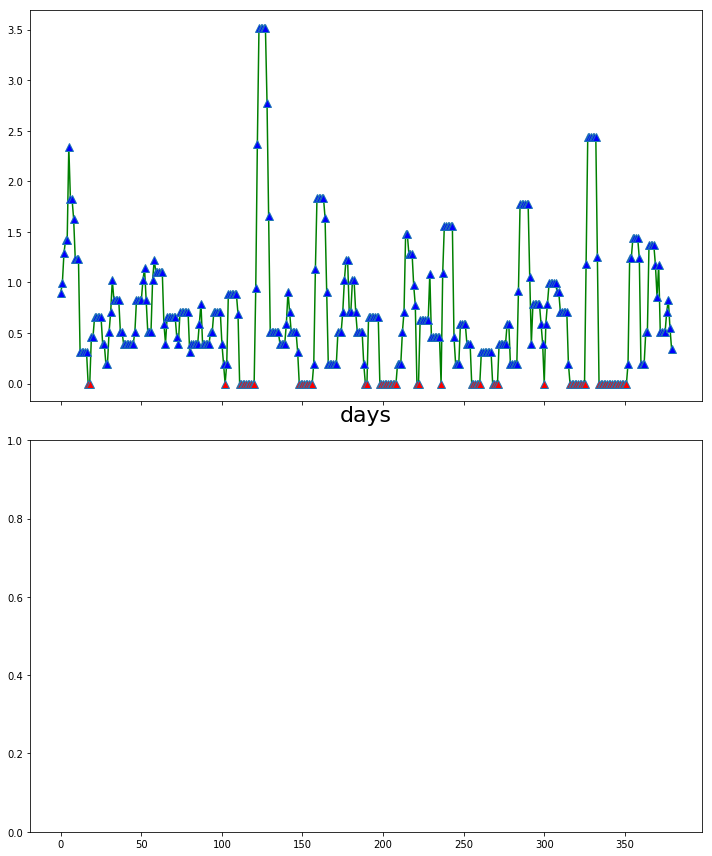

In [12]:
f, axarr = plt.subplots(2, sharex=True, figsize=(10,12))
#plot_epoch_mean_nsw(pat_list[0], label = label, if_yrandom = if_yrandom, ax = axarr[0])
plot_epoch_mean_sw(pat_list[0], ax = axarr[0])
    